# Frequent Pattern Mining

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori

In [2]:
df = pd.read_csv("Training_DU_Association.csv", skipinitialspace=True, sep=',')

In [3]:
df.nunique()

Model                                   261
SubModel                                 38
VehYear                                  10
IsBadBuy                                  2
Auction                                   3
VehicleAge                               10
Make                                     32
Engine                                  128
Trim                                    129
Transmission                              2
WheelTypeID                               3
Nationality                               2
Size                                     12
TopThreeAmericanName                      4
BYRNO                                    72
VNZIP1                                  152
VNST                                     37
IsOnlineSale                              2
Doors                                     5
PurchYearMonth                           24
MMRAcquisitionAuctionAveragePriceBin     17
VehBCostBin                              16
VehOdoBin                       

In [4]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

*** Variabili ***

In [5]:
#df_categorical = df[['Make', 'SubModel', 'Size', 'VNST', 'VehicleAge', 'IsBadBuy']]
df_numerical = df[['MMRAcquisitionAuctionAveragePriceBin', 'VehBCostBin', 'VehOdoBin', 'WarrantyCostBin', 'IsBadBuy']].copy()
df_categorical = df[df.columns.difference(df_numerical.columns[:-1])].copy()

In [6]:
df

,Model,SubModel,VehYear,IsBadBuy,Auction,VehicleAge,Make,Engine,Trim,Transmission,...,BYRNO,VNZIP1,VNST,IsOnlineSale,Doors,PurchYearMonth,MMRAcquisitionAuctionAveragePriceBin,VehBCostBin,VehOdoBin,WarrantyCostBin
0,1500 RAM_Model,QUAD CAB_SubModel,2002_VehYear,0_IsBadBuy,ADESA_Auction,7_VehicleAge,DODGE_Make,5.9L_Engine,ST_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[4367.8, 6109.7)_MMRAcquisitionAuctionAverageP...","[7297.8, 9122.0)_VehBCostBin","[60542.5, 66059.95)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin"
1,1500 RAM_Model,QUAD CAB_SubModel,2003_VehYear,0_IsBadBuy,MANHEIM_Auction,6_VehicleAge,DODGE_Make,5.7L_Engine,LAR_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[6109.7, 7851.6)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[77094.85, 82612.3)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin"
2,1500 RAM_Model,QUAD CAB_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,DODGE_Make,5.7L_Engine,SLT_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[9593.5, 11335.4)_MMRAcquisitionAuctionAverage...","[9122.0, 10946.2)_VehBCostBin","[77094.85, 82612.3)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin"
3,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,ADESA_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin"
4,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20833_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[60542.5, 66059.95)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin"
5,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20928_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[49507.6, 55025.05)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin"
6,ACCENT_Model,SEDAN_SubModel,2004_VehYear,0_IsBadBuy,OTHER_Auction,5_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GL_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[2625.9, 4367.8)_MMRAcquisitionAuctionAverageP...","[3649.4, 5473.6)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin"
7,ACCENT_Model,SEDAN_SubModel,2005_VehYear,1_IsBadBuy,OTHER_Auction,4_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GLS_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[2625.9, 4367.8)_MMRAcquisitionAuctionAverageP...","[3649.4, 5473.6)_VehBCostBin","[55025.05, 60542.5)_VehOdoBin","[462.0, 813.8)_WarrantyCostBin"
8,ACCORD_Model,COUPE_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,HONDA_Make,4C 2.4L_Engine,SE_Trim,AUTO_Transmission,...,20392_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,2D_Doors,2009-01_PurchYearMonth,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[7297.8, 9122.0)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[462.0, 813.8)_WarrantyCostBin"
9,AERIO_Model,SEDAN_SubModel,2003_VehYear,1_IsBadBuy,OTHER_Auction,6_VehicleAge,SUZUKI_Make,2.0L EFI_Engine,S_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[884.0, 2625.9)_MMRAcquisitionAuctionAveragePr...","[3649.4, 5473.6)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin"


In [7]:
baskets_All = df.values.tolist()

del df

In [8]:
df_categorical

,Auction,BYRNO,Doors,Engine,IsBadBuy,IsOnlineSale,Make,Model,Nationality,PurchYearMonth,Size,SubModel,TopThreeAmericanName,Transmission,Trim,VNST,VNZIP1,VehYear,VehicleAge,WheelTypeID
0,ADESA_Auction,20234_BYRNO,nan_Doors,5.9L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,ST_Trim,AZ_VNST,85226_VNZIP1,2002_VehYear,7_VehicleAge,1.0_WheelTypeID
1,MANHEIM_Auction,19619_BYRNO,nan_Doors,5.7L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,LAR_Trim,FL_VNST,32824_VNZIP1,2003_VehYear,6_VehicleAge,1.0_WheelTypeID
2,MANHEIM_Auction,19619_BYRNO,nan_Doors,5.7L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,SLT_Trim,FL_VNST,32824_VNZIP1,2005_VehYear,4_VehicleAge,2.0_WheelTypeID
3,ADESA_Auction,20234_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,AZ_VNST,85226_VNZIP1,2006_VehYear,3_VehicleAge,2.0_WheelTypeID
4,MANHEIM_Auction,20833_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,TX_VNST,75236_VNZIP1,2006_VehYear,3_VehicleAge,1.0_WheelTypeID
5,MANHEIM_Auction,20928_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,FL_VNST,32824_VNZIP1,2006_VehYear,3_VehicleAge,2.0_WheelTypeID
6,OTHER_Auction,835_BYRNO,4D_Doors,1.6L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,HYUNDAI_Make,ACCENT_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,GL_Trim,AZ_VNST,85009_VNZIP1,2004_VehYear,5_VehicleAge,2.0_WheelTypeID
7,OTHER_Auction,835_BYRNO,4D_Doors,1.6L MPI_Engine,1_IsBadBuy,0_IsOnlineSale,HYUNDAI_Make,ACCENT_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,GLS_Trim,AZ_VNST,85009_VNZIP1,2005_VehYear,4_VehicleAge,1.0_WheelTypeID
8,MANHEIM_Auction,20392_BYRNO,2D_Doors,4C 2.4L_Engine,0_IsBadBuy,0_IsOnlineSale,HONDA_Make,ACCORD_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,MEDIUM_Size,COUPE_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,SE_Trim,TX_VNST,75236_VNZIP1,2005_VehYear,4_VehicleAge,1.0_WheelTypeID
9,OTHER_Auction,835_BYRNO,4D_Doors,2.0L EFI_Engine,1_IsBadBuy,0_IsOnlineSale,SUZUKI_Make,AERIO_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,S_Trim,AZ_VNST,85009_VNZIP1,2003_VehYear,6_VehicleAge,1.0_WheelTypeID


In [9]:
baskets_Categorical = df_categorical.values.tolist()

del df_categorical

In [10]:
df_numerical

,MMRAcquisitionAuctionAveragePriceBin,VehBCostBin,VehOdoBin,WarrantyCostBin,IsBadBuy
0,"[4367.8, 6109.7)_MMRAcquisitionAuctionAverageP...","[7297.8, 9122.0)_VehBCostBin","[60542.5, 66059.95)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin",0_IsBadBuy
1,"[6109.7, 7851.6)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[77094.85, 82612.3)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin",0_IsBadBuy
2,"[9593.5, 11335.4)_MMRAcquisitionAuctionAverage...","[9122.0, 10946.2)_VehBCostBin","[77094.85, 82612.3)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin",0_IsBadBuy
3,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin",0_IsBadBuy
4,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[60542.5, 66059.95)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin",0_IsBadBuy
5,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[9122.0, 10946.2)_VehBCostBin","[49507.6, 55025.05)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin",0_IsBadBuy
6,"[2625.9, 4367.8)_MMRAcquisitionAuctionAverageP...","[3649.4, 5473.6)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[813.8, 1165.6)_WarrantyCostBin",0_IsBadBuy
7,"[2625.9, 4367.8)_MMRAcquisitionAuctionAverageP...","[3649.4, 5473.6)_VehBCostBin","[55025.05, 60542.5)_VehOdoBin","[462.0, 813.8)_WarrantyCostBin",1_IsBadBuy
8,"[7851.6, 9593.5)_MMRAcquisitionAuctionAverageP...","[7297.8, 9122.0)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[462.0, 813.8)_WarrantyCostBin",0_IsBadBuy
9,"[884.0, 2625.9)_MMRAcquisitionAuctionAveragePr...","[3649.4, 5473.6)_VehBCostBin","[71577.4, 77094.85)_VehOdoBin","[1165.6, 1517.4)_WarrantyCostBin",1_IsBadBuy


In [11]:
baskets_Numerical = df_numerical.values.tolist()

del df_numerical

In [12]:
baskets_All[0]

['1500 RAM_Model',
 'QUAD CAB_SubModel',
 '2002_VehYear',
 '0_IsBadBuy',
 'ADESA_Auction',
 '7_VehicleAge',
 'DODGE_Make',
 '5.9L_Engine',
 'ST_Trim',
 'AUTO_Transmission',
 '1.0_WheelTypeID',
 'AMERICAN_Nationality',
 'LARGE TRUCK_Size',
 'CHRYSLER_TopThreeAmericanName',
 '20234_BYRNO',
 '85226_VNZIP1',
 'AZ_VNST',
 '0_IsOnlineSale',
 'nan_Doors',
 '2009-01_PurchYearMonth',
 '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin',
 '[7297.8, 9122.0)_VehBCostBin',
 '[60542.5, 66059.95)_VehOdoBin',
 '[813.8, 1165.6)_WarrantyCostBin']

In [13]:
baskets_Categorical[0]

['ADESA_Auction',
 '20234_BYRNO',
 'nan_Doors',
 '5.9L_Engine',
 '0_IsBadBuy',
 '0_IsOnlineSale',
 'DODGE_Make',
 '1500 RAM_Model',
 'AMERICAN_Nationality',
 '2009-01_PurchYearMonth',
 'LARGE TRUCK_Size',
 'QUAD CAB_SubModel',
 'CHRYSLER_TopThreeAmericanName',
 'AUTO_Transmission',
 'ST_Trim',
 'AZ_VNST',
 '85226_VNZIP1',
 '2002_VehYear',
 '7_VehicleAge',
 '1.0_WheelTypeID']

In [14]:
baskets_Numerical[0]

['[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin',
 '[7297.8, 9122.0)_VehBCostBin',
 '[60542.5, 66059.95)_VehOdoBin',
 '[813.8, 1165.6)_WarrantyCostBin',
 '0_IsBadBuy']

Minimum Support in percentuale

In [15]:
MinSupp_Perc = 1 #%

## Mining per livello di Min Support

*** Note ***

A closed pattern is a frequent pattern. So it meets the minimum support criteria. In addition to that, all super-patterns of a closed pattern are less frequent than the closed pattern.

Let’s see some examples.

Suppose, the minimum support count is 2. For the first example, suppose there are a total of 3 items: a, b, c. Suppose a pattern ab has support count of 2 and a pattern abc has support count of 2. Is the pattern ab is a closed pattern? Pattern ab is a frequent pattern, but it has a super-pattern that is NOT less frequent than ab.

For the second example, suppose there are a total of 3 items: x, y, z. suppose a pattern xy has support count of 3 and a pattern xyz has support count of 2. Is the pattern xy is a closed pattern? Pattern xy is a frequent pattern and also the only super-pattern xyz is less frequent than xy.

Therefore, xy is a closed pattern.

A max pattern is a frequent pattern. So it also meets the minimum support criteria like closed pattern In addition, but unlike closed pattern, all super-patterns of a max pattern are NOT frequent patterns.

Let’s see some examples as well.

Suppose, the minimum support count is 2. Like before, for the first example, suppose there are a total of 3 items: a, b, c. Suppose a pattern ab has support count of 3 and a pattern abc has support count of 2. Is the pattern ab is a max pattern? Pattern ab is a frequent pattern, but it has a super-pattern that is a frequent pattern as well. So, pattern ab is NOT a max pattern.

For the second example,

suppose there are a total of 3 items: x, y, z. Suppose a pattern xy has support count of 3 and a pattern xyz has support count of 1. Is the pattern xy is a max pattern? Pattern xy is a frequent pattern and also the only super-pattern xyz is NOT a frequent pattern. Therefore, xy is a max pattern.

"All Itemsets", sono tutti i possibili pattern frequenti che rispettano il limite di Support definito; "Closed Itemsets", sono tutti i pattern frequenti i quali sovrainsiemi sono meno frequenti di essi (vengono cioè esclusi solo i sottoinsiemi frequenti tanto quanto i Closed Itemsets, che quindi rappresentano i pattern più ampi possibili per ogni livello di Support); "Maximal Itemsets", sono tutti i pattern frequenti i quali sovrainsiemi sono pattern che non rispettano i limiti di Support (cioè i pattern più ampi possibili immediatamente precedenti a quelli non frequenti). <br>

Ad esempio posto Min Supp = 2 e dati Supp(A) = 3, Supp(AB) = 3, Supp(ABC) = 2 e Supp(ABCD) = 1, abbiamo i seguenti tipi di Pattern Frequenti per l'Item A: All Itemsets = $\{A; AB; ABC\}$, Closed Itemsets = $\{AB; ABC\}$, Maximal Itemsets = $\{ABC\}$. Rispetto al caso di tutti i possibili pattern frequenti gli altri due ci permettono di individuare la conformazione più ampia possibile di patterns che rispettano i limiti di Support. I Closed Itemsets in particolare rappresentano i pattern più ampi possibili per ogni livello di Support, escludendo cioè i sottoinsiemi irrilevanti. Motivo questo per cui l'estrazione di Pattern interessanti è stata fatta su questa categoria di Pattern frequenti. 

** 1) All Itemsets per Min Support **

In [16]:
itemsets_list = list()
itemsets_len = list()

count = 0

for MS in range(MinSupp_Perc, 100, 1):
    itemsets_list.append(
        apriori(baskets_All, supp = MS, zmin=2, zmax=4, target='a', report='aS')
    )
    itemsets_len.append(len(itemsets_list[count]))
    print('Numero di Pattern Frequenti con Min Support = ' + str(MS) + ' %: ' + str(itemsets_len[count]))
    count+=1

Numero di Pattern Frequenti con Min Support = 1 %: 136340
Numero di Pattern Frequenti con Min Support = 2 %: 49803
Numero di Pattern Frequenti con Min Support = 3 %: 25266
Numero di Pattern Frequenti con Min Support = 4 %: 15159
Numero di Pattern Frequenti con Min Support = 5 %: 10281
Numero di Pattern Frequenti con Min Support = 6 %: 7306
Numero di Pattern Frequenti con Min Support = 7 %: 5548
Numero di Pattern Frequenti con Min Support = 8 %: 4392
Numero di Pattern Frequenti con Min Support = 9 %: 3490
Numero di Pattern Frequenti con Min Support = 10 %: 2833
Numero di Pattern Frequenti con Min Support = 11 %: 2255
Numero di Pattern Frequenti con Min Support = 12 %: 1858
Numero di Pattern Frequenti con Min Support = 13 %: 1508
Numero di Pattern Frequenti con Min Support = 14 %: 1266
Numero di Pattern Frequenti con Min Support = 15 %: 1086
Numero di Pattern Frequenti con Min Support = 16 %: 910
Numero di Pattern Frequenti con Min Support = 17 %: 771
Numero di Pattern Frequenti con Min 

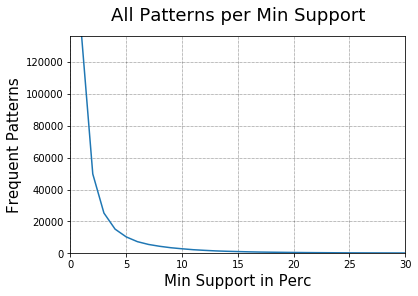

In [17]:
plt.plot(range(MinSupp_Perc, 100, 1), itemsets_len)
plt.title('All Patterns per Min Support', fontsize=18, pad=15)
plt.ylabel('Frequent Patterns', fontsize=15)
plt.xlabel('Min Support in Perc', fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=3)
plt.axis([0, 30, 0, len(itemsets_list[0]) + 100])
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.plot(figsize=(20,5))
plt.show()

In [18]:
itemsets_list[60][:50]

[(('AMERICAN_Nationality', '4D_Doors'), 33592, 65.98829214630888),
 (('AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'),
  32934,
  64.69571366832987),
 (('AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  32085,
  63.02793383884021),
 (('AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'),
  32719,
  64.27336659725769),
 (('AMERICAN_Nationality', '0_IsBadBuy'), 36659, 72.01312222527795),
 (('AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission'),
  35626,
  69.98389187914981),
 (('AMERICAN_Nationality',
   '0_IsBadBuy',
   'AUTO_Transmission',
   '0_IsOnlineSale'),
  34739,
  68.24146466035438),
 (('AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'),
  35736,
  70.19997642714021),
 (('AMERICAN_Nationality', 'AUTO_Transmission'), 40626, 79.80591678780497),
 (('AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'),
  39620,
  77.82972537618356),
 (('AMERICAN_Nationality', '0_IsOnlineSale'), 40757, 80.06325384041175),
 (('4D_Doors', '0_Is

In [19]:
del itemsets_list
del itemsets_len

** 2) Closed Itemsets per Min Support **

In [20]:
itemsets_list = list()
itemsets_len = list()

count = 0

for MS in range(MinSupp_Perc, 100, 1):
    itemsets_list.append(
        apriori(baskets_All, supp = MS, zmin=2, zmax=4, target='c', report='aS')
    )
    itemsets_len.append(len(itemsets_list[count]))
    print('Numero di Pattern Frequenti con Min Support = ' + str(MS) + ' %: ' + str(itemsets_len[count]))
    count+=1

Numero di Pattern Frequenti con Min Support = 1 %: 58758
Numero di Pattern Frequenti con Min Support = 2 %: 27051
Numero di Pattern Frequenti con Min Support = 3 %: 15427
Numero di Pattern Frequenti con Min Support = 4 %: 10129
Numero di Pattern Frequenti con Min Support = 5 %: 7218
Numero di Pattern Frequenti con Min Support = 6 %: 5343
Numero di Pattern Frequenti con Min Support = 7 %: 4162
Numero di Pattern Frequenti con Min Support = 8 %: 3365
Numero di Pattern Frequenti con Min Support = 9 %: 2726
Numero di Pattern Frequenti con Min Support = 10 %: 2243
Numero di Pattern Frequenti con Min Support = 11 %: 1833
Numero di Pattern Frequenti con Min Support = 12 %: 1530
Numero di Pattern Frequenti con Min Support = 13 %: 1263
Numero di Pattern Frequenti con Min Support = 14 %: 1073
Numero di Pattern Frequenti con Min Support = 15 %: 933
Numero di Pattern Frequenti con Min Support = 16 %: 802
Numero di Pattern Frequenti con Min Support = 17 %: 685
Numero di Pattern Frequenti con Min Sup

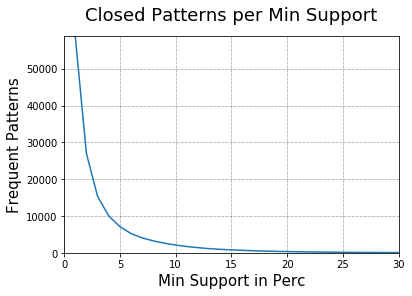

In [21]:
plt.plot(range(MinSupp_Perc, 100, 1), itemsets_len)
plt.title('Closed Patterns per Min Support', fontsize=18, pad=15)
plt.ylabel('Frequent Patterns', fontsize=15)
plt.xlabel('Min Support in Perc', fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=3)
plt.axis([0, 30, 0, len(itemsets_list[0]) + 100])
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.plot(figsize=(20,5))
plt.show()

In [22]:
itemsets_list[60][:20]

[(('AMERICAN_Nationality', '4D_Doors'), 33592, 65.98829214630888),
 (('AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'),
  32934,
  64.69571366832987),
 (('AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  32085,
  63.02793383884021),
 (('AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'),
  32719,
  64.27336659725769),
 (('AMERICAN_Nationality', '0_IsBadBuy'), 36659, 72.01312222527795),
 (('AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission'),
  35626,
  69.98389187914981),
 (('AMERICAN_Nationality',
   '0_IsBadBuy',
   'AUTO_Transmission',
   '0_IsOnlineSale'),
  34739,
  68.24146466035438),
 (('AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'),
  35736,
  70.19997642714021),
 (('AMERICAN_Nationality', 'AUTO_Transmission'), 40626, 79.80591678780497),
 (('AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'),
  39620,
  77.82972537618356),
 (('AMERICAN_Nationality', '0_IsOnlineSale'), 40757, 80.06325384041175),
 (('4D_Doors', '0_Is

In [23]:
del itemsets_list
del itemsets_len

** 3) Maximal Itemsets per Min Support **

In [24]:
itemsets_list = list()
itemsets_len = list()

count = 0

for MS in range(MinSupp_Perc, 100, 1):
    itemsets_list.append(
        apriori(baskets_All, supp = MS, zmin=2, zmax=4, target='m', report='aS')
    )
    itemsets_len.append(len(itemsets_list[count]))
    print('Numero di Pattern Frequenti con Min Support = ' + str(MS) + ' %: ' + str(itemsets_len[count]))
    count+=1

Numero di Pattern Frequenti con Min Support = 1 %: 1446
Numero di Pattern Frequenti con Min Support = 2 %: 813
Numero di Pattern Frequenti con Min Support = 3 %: 526
Numero di Pattern Frequenti con Min Support = 4 %: 386
Numero di Pattern Frequenti con Min Support = 5 %: 280
Numero di Pattern Frequenti con Min Support = 6 %: 193
Numero di Pattern Frequenti con Min Support = 7 %: 175
Numero di Pattern Frequenti con Min Support = 8 %: 153
Numero di Pattern Frequenti con Min Support = 9 %: 144
Numero di Pattern Frequenti con Min Support = 10 %: 123
Numero di Pattern Frequenti con Min Support = 11 %: 108
Numero di Pattern Frequenti con Min Support = 12 %: 100
Numero di Pattern Frequenti con Min Support = 13 %: 76
Numero di Pattern Frequenti con Min Support = 14 %: 60
Numero di Pattern Frequenti con Min Support = 15 %: 55
Numero di Pattern Frequenti con Min Support = 16 %: 64
Numero di Pattern Frequenti con Min Support = 17 %: 56
Numero di Pattern Frequenti con Min Support = 18 %: 46
Numero

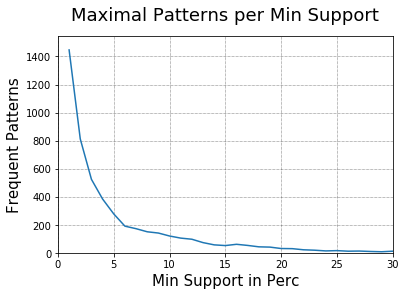

In [25]:
plt.plot(range(MinSupp_Perc, 100, 1), itemsets_len)
plt.title('Maximal Patterns per Min Support', fontsize=18, pad=15)
plt.ylabel('Frequent Patterns', fontsize=15)
plt.xlabel('Min Support in Perc', fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=3)
plt.axis([0, 30, 0, len(itemsets_list[0]) + 100])
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.plot(figsize=(20,5))
plt.show()

In [26]:
itemsets_list[20][:20]

[(('[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '0_IsOnlineSale'),
  10863,
  21.339331316544218),
 (('4_VehicleAge', 'AUTO_Transmission', '0_IsOnlineSale'),
  10714,
  21.046634974266297),
 (('[1165.6, 1517.4)_WarrantyCostBin', 'AUTO_Transmission', '0_IsOnlineSale'),
  11024,
  21.655600518602917),
 (('2006_VehYear', 'AUTO_Transmission', '0_IsOnlineSale'),
  10923,
  21.45719561544808),
 (('[462.0, 813.8)_WarrantyCostBin', 'AUTO_Transmission'),
  10729,
  21.07610104899226),
 (('[462.0, 813.8)_WarrantyCostBin', '0_IsOnlineSale'),
  11355,
  22.30581856755589),
 (('BAS_Trim', 'AUTO_Transmission', '0_IsOnlineSale'),
  11027,
  21.66149373354811),
 (('CHEVROLET_Make',
   'GM_TopThreeAmericanName',
   'AMERICAN_Nationality',
   '0_IsBadBuy'),
  10796,
  21.20771618276824),
 (('[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'),
  10727,
  21.072172239028795),
 (('[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin',
   'AUTO_Transmission',
   '0_IsOnlineSa

In [27]:
itemsets_list[40][:20]

[(('MEDIUM_Size', '4D_Doors'), 20887, 41.0305268534161),
 (('MEDIUM_Size', '0_IsOnlineSale'), 21041, 41.333045220602685),
 (('2.0_WheelTypeID', '0_IsBadBuy', '0_IsOnlineSale'),
  21087,
  41.423407849762306),
 (('2.0_WheelTypeID', 'AUTO_Transmission', '0_IsOnlineSale'),
  21981,
  43.17958590342985),
 (('1.0_WheelTypeID',
   'AMERICAN_Nationality',
   'AUTO_Transmission',
   '0_IsOnlineSale'),
  21302,
  41.84575492083448),
 (('1.0_WheelTypeID', '4D_Doors', 'AUTO_Transmission'),
  21386,
  42.01076493929989),
 (('1.0_WheelTypeID', '4D_Doors', '0_IsOnlineSale'), 21256, 41.75539229167485),
 (('1.0_WheelTypeID', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'),
  21128,
  41.503948454013276),
 (('MANHEIM_Auction',
   'AMERICAN_Nationality',
   'AUTO_Transmission',
   '0_IsOnlineSale'),
  21869,
  42.95957254547598),
 (('MANHEIM_Auction', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  21607,
  42.44489844026245),
 (('MANHEIM_Auction', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnli

In [28]:
itemsets_list[50][:20]

[(('1.0_WheelTypeID', 'AUTO_Transmission'), 26041, 51.15507012925785),
 (('1.0_WheelTypeID', '0_IsOnlineSale'), 26187, 51.441873256590576),
 (('MANHEIM_Auction', 'AUTO_Transmission', '0_IsOnlineSale'),
  26529,
  52.11369976034259),
 (('SEDAN_SubModel', '4D_Doors', '0_IsBadBuy'), 26307, 51.677601854398304),
 (('SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  28019,
  55.04066318312183)]

In [29]:
itemsets_list[60][:20]

[(('AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  32085,
  63.02793383884021),
 (('AMERICAN_Nationality',
   '0_IsBadBuy',
   'AUTO_Transmission',
   '0_IsOnlineSale'),
  34739,
  68.24146466035438),
 (('4D_Doors', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'),
  34620,
  68.00770046752838)]

In [30]:
itemsets_list[70][:20]

[(('AMERICAN_Nationality', '0_IsBadBuy'), 36659, 72.01312222527795),
 (('AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'),
  39620,
  77.82972537618356),
 (('4D_Doors', '0_IsBadBuy'), 36661, 72.01705103524144),
 (('4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'),
  39528,
  77.6490001178643),
 (('0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'),
  41769,
  82.05123168192354)]

In [31]:
itemsets_list[80][:20]

[(('0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'),
  41769,
  82.05123168192354)]

In [32]:
itemsets_list[90][:20]

[(('AUTO_Transmission', '0_IsOnlineSale'), 47766, 93.83176835736455)]

In [33]:
del itemsets_list
del itemsets_len

## Pattern Extraction

### 1) Tutto il Dataset

In [34]:
itemsets = apriori(baskets_All, supp = MinSupp_Perc,
                   zmin=2, #zmax=4,
                   target='c', report='aS')

In [35]:
del baskets_All

In [36]:
print('Number of total itemsets:', len(itemsets))

Number of total itemsets: 404153


ordino tutti gli Itemset Frequenti trovati per Support decrescente

In [37]:
def sortPosition(r_th): 
    return r_th[1]

itemsets.sort(key = sortPosition, reverse = True)

in cima abbiamo gli Itemset più frequenti in assoluto

In [38]:
for i in itemsets[:42]:
    print(i)

(('AUTO_Transmission', '0_IsOnlineSale'), 47766, 93.83176835736455)
(('0_IsBadBuy', '0_IsOnlineSale'), 43396, 85.24731858719994)
(('0_IsBadBuy', 'AUTO_Transmission'), 42842, 84.15903822732095)
(('0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 41769, 82.05123168192354)
(('AMERICAN_Nationality', '0_IsOnlineSale'), 40757, 80.06325384041175)
(('4D_Doors', '0_IsOnlineSale'), 40757, 80.06325384041175)
(('AMERICAN_Nationality', 'AUTO_Transmission'), 40626, 79.80591678780497)
(('4D_Doors', 'AUTO_Transmission'), 40574, 79.70376772875495)
(('AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 39620, 77.82972537618356)
(('4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 39528, 77.6490001178643)
(('4D_Doors', '0_IsBadBuy'), 36661, 72.01705103524144)
(('AMERICAN_Nationality', '0_IsBadBuy'), 36659, 72.01312222527795)
(('AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'), 35736, 70.19997642714021)
(('4D_Doors', '0_IsBadBuy', '0_IsOnlineSale'), 35700, 70.1292578477979)
(('AMERIC

in fondo i meno frequenti in assoluto

In [39]:
for i in itemsets[-10:]:
    print(i)

(('OTHER_Auction', '[813.8, 1165.6)_WarrantyCostBin', 'nan_Engine', '2.0_WheelTypeID', 'AMERICAN_Nationality', '0_IsBadBuy'), 510, 1.0018465406828272)
(('OTHER_Auction', 'nan_Engine', 'MEDIUM_Size', '1.0_WheelTypeID', 'AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'), 510, 1.0018465406828272)
(('[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '[813.8, 1165.6)_WarrantyCostBin', 'CHRYSLER_TopThreeAmericanName', 'nan_Engine', '2.0_WheelTypeID', 'AMERICAN_Nationality', '0_IsBadBuy'), 510, 1.0018465406828272)
(('[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '[813.8, 1165.6)_WarrantyCostBin', 'nan_Engine', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 510, 1.0018465406828272)
(('[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '[7297.8, 9122.0)_VehBCostBin', 'GM_TopThreeAmericanName', '2.0_WheelTypeID', 'MANHEIM_Auction', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', '0_IsBadBuy', 'AUTO_Transmission', '0_I

- Focus sul valore da minare

In [40]:
ValueToMine = '1_IsBadBuy'

count = 0

for i in itemsets:
    if ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero totale di Itemset Frequenti nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '0_IsOnlineSale'), 6215, 12.208776961458375)
(('1_IsBadBuy', 'AUTO_Transmission'), 6146, 12.073233017718934)
(('1_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 5997, 11.780536675441008)
(('1_IsBadBuy', '4D_Doors'), 5191, 10.197226260165795)
(('1_IsBadBuy', 'AMERICAN_Nationality'), 5148, 10.112756845951361)
(('1_IsBadBuy', '4D_Doors', '0_IsOnlineSale'), 5057, 9.933995992613836)
(('1_IsBadBuy', '4D_Doors', 'AUTO_Transmission'), 5033, 9.886850273052293)
(('1_IsBadBuy', 'AMERICAN_Nationality', '0_IsOnlineSale'), 5021, 9.86327741327152)
(('1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission'), 5000, 9.822024908655168)
(('1_IsBadBuy', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 4908, 9.641299650335913)
(('1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 4881, 9.588260715829175)
(('1_IsBadBuy', '1.0_WheelTypeID'), 4425, 8.692492044159824)
(('1_IsBadBuy', '1.0_WheelTypeID', 'AUTO_Transmission'), 4314, 8.474443091187679)
(('1_IsBadBuy

(('1_IsBadBuy', 'FORD_TopThreeAmericanName', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 991, 1.9467253368954545)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', '1.0_WheelTypeID', 'SEDAN_SubModel', '0_IsOnlineSale'), 991, 1.9467253368954545)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin', 'MANHEIM_Auction'), 991, 1.9467253368954545)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'MEDIUM_Size', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 990, 1.9447609319137231)
(('1_IsBadBuy', 'ADESA_Auction', '1.0_WheelTypeID', 'AMERICAN_Nationality'), 989, 1.9427965269319922)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin', '1.0_WheelTypeID', 'AMERICAN_Nationality', 'AUTO_Transmission'), 989, 1.9427965269319922)
(('1_IsBadBuy', '4_VehicleAge', 'AMERICAN_Nationality'), 988, 1.9408321219502613)
(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', 'SEDAN_SubModel', 'AUTO_Transmission', '0_IsOnlineSale'), 988, 1.9408321219502613)
(('1_IsBadBuy', '[71577.4, 77094.85)_VehOdoBi

(('1_IsBadBuy', 'nan_Engine', '1.0_WheelTypeID', 'SEDAN_SubModel', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 816, 1.6029544650925234)
(('1_IsBadBuy', 'MEDIUM_Size', 'MANHEIM_Auction', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors'), 816, 1.6029544650925234)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin', 'AMERICAN_Nationality', '0_IsOnlineSale'), 815, 1.6009900601107925)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin', 'SEDAN_SubModel', 'AUTO_Transmission'), 815, 1.6009900601107925)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', '1.0_WheelTypeID', '4D_Doors', '0_IsOnlineSale'), 815, 1.6009900601107925)
(('1_IsBadBuy', 'GM_TopThreeAmericanName', 'MANHEIM_Auction', 'AMERICAN_Nationality', '4D_Doors'), 815, 1.6009900601107925)
(('6_VehicleAge', '1_IsBadBuy', 'AMERICAN_Nationality', '0_IsOnlineSale'), 814, 1.5990256551290616)
(('1_IsBadBuy', 'SE_Trim', 'AUTO_Transmission', '0_IsOnlineSale'), 814, 1.5990256551290616)
(('1_IsBadBuy', 

(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 744, 1.461517306407889)
(('[1517.4, 1869.2)_WarrantyCostBin', '1_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 743, 1.4595529014261581)
(('6_VehicleAge', '1_IsBadBuy', '1.0_WheelTypeID', 'AUTO_Transmission'), 743, 1.4595529014261581)
(('1_IsBadBuy', '5_VehicleAge', '2005_VehYear', 'AUTO_Transmission'), 743, 1.4595529014261581)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 743, 1.4595529014261581)
(('1_IsBadBuy', 'TX_VNST', '1.0_WheelTypeID', 'AMERICAN_Nationality'), 743, 1.4595529014261581)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin', 'SEDAN_SubModel', 'AMERICAN_Nationality', 'AUTO_Transmission'), 743, 1.4595529014261581)
(('1_IsBadBuy', 'nan_Engine', '[5473.6, 7297.8)_VehBCostBin', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 743, 1.4595529014261581)
(('

(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', 'MANHEIM_Auction'), 639, 1.2552547833261305)
(('SUV_SubModel', '1_IsBadBuy', '1.0_WheelTypeID', 'AMERICAN_Nationality', 'AUTO_Transmission'), 638, 1.2532903783443996)
(('1_IsBadBuy', '[82612.3, 88129.75)_VehOdoBin', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 638, 1.2532903783443996)
(('1_IsBadBuy', 'nan_Engine', '[5473.6, 7297.8)_VehBCostBin', 'AMERICAN_Nationality', 'AUTO_Transmission'), 638, 1.2532903783443996)
(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', '1.0_WheelTypeID', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission'), 638, 1.2532903783443996)
(('1_IsBadBuy', 'FORD_Make', 'FORD_TopThreeAmericanName', 'MANHEIM_Auction', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 637, 1.2513259733626685)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'nan_Engine', '0_IsOnlineSale'), 637, 1.2513259733626685)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', '1.0_WheelTypeID', 'MANHEIM_Auction'

(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', 'MANHEIM_Auction', 'AUTO_Transmission', '0_IsOnlineSale'), 574, 1.1275684595136133)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin', 'nan_Engine', 'AUTO_Transmission', '0_IsOnlineSale'), 574, 1.1275684595136133)
(('1_IsBadBuy', 'GM_TopThreeAmericanName', 'MEDIUM_Size', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 574, 1.1275684595136133)
(('1_IsBadBuy', 'nan_Engine', '[5473.6, 7297.8)_VehBCostBin', 'SEDAN_SubModel', 'AUTO_Transmission', '0_IsOnlineSale'), 574, 1.1275684595136133)
(('NC_VNST', '1_IsBadBuy', '0_IsOnlineSale'), 573, 1.1256040545318824)
(('MEDIUM SUV_Size', '1_IsBadBuy', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 573, 1.1256040545318824)
(('1_IsBadBuy', '2004_VehYear', 'MANHEIM_Auction'), 573, 1.1256040545318824)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'MEDIUM_Size', '4D_Doors'), 573, 1.1256040545318824)
(('1_IsBadBuy', '[1

(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality'), 523, 1.0273838054453306)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'GM_TopThreeAmericanName', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors'), 523, 1.0273838054453306)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'nan_Engine', 'MEDIUM_Size', 'AUTO_Transmission', '0_IsOnlineSale'), 523, 1.0273838054453306)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', '2.0_WheelTypeID', 'MANHEIM_Auction'), 523, 1.0273838054453306)
(('1_IsBadBuy', 'CHRYSLER_TopThreeAmericanName', '1.0_WheelTypeID', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 523, 1.0273838054453306)
(('2003_VehYear', '1_IsBadBuy', '1.0_WheelTypeID', '4D_Doors'), 522, 1.0254194004635997)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 522, 1.0254194004635997)
(('1_IsBadBuy', 'FORD

In [41]:
count = 0

for i in itemsets:
    if len(i[0]) == 2 and ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero di Itemset Frequenti con due elementi nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '0_IsOnlineSale'), 6215, 12.208776961458375)
(('1_IsBadBuy', 'AUTO_Transmission'), 6146, 12.073233017718934)
(('1_IsBadBuy', '4D_Doors'), 5191, 10.197226260165795)
(('1_IsBadBuy', 'AMERICAN_Nationality'), 5148, 10.112756845951361)
(('1_IsBadBuy', '1.0_WheelTypeID'), 4425, 8.692492044159824)
(('1_IsBadBuy', 'SEDAN_SubModel'), 3558, 6.989352924999018)
(('1_IsBadBuy', 'MANHEIM_Auction'), 3287, 6.4569991749499085)
(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '2.0_WheelTypeID'), 1892, 3.7166542254351156)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', 'ADESA_Auction'), 1598, 3.139119160806192)
(('1_IsBadBu

** - Top Patterns **

In [42]:
topPatterns = list()

for i in itemsets:
    if i[2] <= 5:
        topPatterns.append(i)
        #print(r)

print('\nNumero di topPatterns: ' + str(len(topPatterns)))


Numero di topPatterns: 387392


In [43]:
del itemsets

In [44]:
for i in topPatterns[:42]:
    print(i)

(('[88129.75, 93647.2)_VehOdoBin', 'AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('2008_VehYear', '2_VehicleAge', 'AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('2008_VehYear', '[7297.8, 9122.0)_VehBCostBin', 'AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('CHRYSLER_Make', 'CHRYSLER_TopThreeAmericanName', 'nan_Engine', 'AMERICAN_Nationality', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('LS_Trim', 'nan_Engine'), 2545, 4.999410678505481)
(('2007_VehYear', '3_VehicleAge', 'nan_Engine', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission'), 2545, 4.999410678505481)
(('2007_VehYear', 'nan_Engine', 'SEDAN_SubModel', '4D_Doors', '0_IsBadBuy', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('TX_VNST', 'MEDIUM_Size', 'AMERICAN_Nationality', '4D_Doors'), 2545, 4.999410678505481)
(('2005_VehYear', 'GM_TopThreeAmericanName', 'AMER

- Focus sul valore da minare

In [45]:
ValueToMine = '1_IsBadBuy'

count = 0

for p in topPatterns:
    if ValueToMine in p[0]:
        print(p)
        count += 1
        
print('\n\nNumero totale di Top Patterns in cui è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', 'MANHEIM_Auction', '4D_Doors', 'AUTO_Transmission'), 2518, 4.946371743998743)
(('1_IsBadBuy', 'MANHEIM_Auction', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 2502, 4.914941264291047)
(('1_IsBadBuy', 'MEDIUM_Size', '0_IsOnlineSale'), 2468, 4.848151494912191)
(('1_IsBadBuy', 'MANHEIM_Auction', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 2460, 4.832436255058343)
(('1_IsBadBuy', 'MEDIUM_Size', 'AUTO_Transmission'), 2450, 4.812792205241032)
(('1_IsBadBuy', 'nan_Engine', '0_IsOnlineSale'), 2426, 4.765646485679487)
(('1_IsBadBuy', 'MEDIUM_Size', '4D_Doors'), 2416, 4.746002435862177)
(('1_IsBadBuy', 'nan_Engine', 'AUTO_Transmission'), 2393, 4.700821121282363)
(('1_IsBadBuy', 'MEDIUM_Size', 'AUTO_Transmission', '0_IsOnlineSale'), 2386, 4.687070286410246)
(('1_IsBadBuy', 'MEDIUM_Size', '4D_Doors', '0_IsOnlineSale'), 2349, 4.6143873020861985)


(('1_IsBadBuy', 'MEDIUM_Size', '2.0_WheelTypeID'), 962, 1.8897575924252543)
(('6_VehicleAge', '1_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 961, 1.8877931874435232)
(('1_IsBadBuy', '[82612.3, 88129.75)_VehOdoBin', 'AUTO_Transmission', '0_IsOnlineSale'), 961, 1.8877931874435232)
(('1_IsBadBuy', 'ADESA_Auction', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 960, 1.8858287824617923)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '[3649.4, 5473.6)_VehBCostBin', 'SEDAN_SubModel', 'AUTO_Transmission', '0_IsOnlineSale'), 959, 1.8838643774800612)
(('1_IsBadBuy', 'BAS_Trim', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 959, 1.8838643774800612)
(('1_IsBadBuy', 'CHEVROLET_Make', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality', '4D_Doors'), 959, 1.8838643774800612)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 959, 1.8838643

(('1_IsBadBuy', 'OTHER_Auction', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors'), 774, 1.52044945585982)
(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', '1.0_WheelTypeID', 'AUTO_Transmission'), 774, 1.52044945585982)
(('1_IsBadBuy', 'nan_Engine', '2.0_WheelTypeID', '0_IsOnlineSale'), 774, 1.52044945585982)
(('1_IsBadBuy', 'nan_Engine', 'MANHEIM_Auction', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 774, 1.52044945585982)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 774, 1.52044945585982)
(('MEDIUM SUV_Size', '1_IsBadBuy', '0_IsOnlineSale'), 773, 1.518485050878089)
(('1_IsBadBuy', '5_VehicleAge', '2005_VehYear'), 773, 1.518485050878089)
(('1_IsBadBuy', 'TX_VNST', 'MANHEIM_Auction'), 773, 1.518485050878089)
(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors'), 773, 1.518485050878089)
(('1_IsBadBuy', '[82612.3, 88129.75)_VehOdoBin', '

(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', '1.0_WheelTypeID', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '1.0_WheelTypeID', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[462.0, 813.8)_WarrantyCostBin', '1.0_WheelTypeID', 'AUTO_Transmission'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'nan_Engine', 'SEDAN_SubModel', 'AMERICAN_Nationality'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'MEDIUM_Size', '1.0_WheelTypeID', '4D_Doors'), 686, 1.3475818174674892)
(('1_IsBadBuy', 'OTHER_Auction', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin', 'MEDIUM_Size', 'SEDAN_SubModel', '4D_Doors'), 686, 1.3475818174674892)
(('1_IsBadBuy', '[262

(('[884.0, 2625.9)_MMRAcquisitionAuctionAveragePriceBin', '1_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 586, 1.1511413192943858)
(('1_IsBadBuy', 'LS_Trim', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality'), 586, 1.1511413192943858)
(('1_IsBadBuy', '[7851.6, 9593.5)_MMRAcquisitionAuctionAveragePriceBin', 'AUTO_Transmission', '0_IsOnlineSale'), 586, 1.1511413192943858)
(('1_IsBadBuy', '2005_VehYear', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 586, 1.1511413192943858)
(('1_IsBadBuy', '3_VehicleAge', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 586, 1.1511413192943858)
(('1_IsBadBuy', 'BAS_Trim', '2.0_WheelTypeID', '4D_Doors'), 586, 1.1511413192943858)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin', 'MEDIUM_Size', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 586, 1.1511413192943858)
(('1_IsBadBuy', 'nan_Engine', '[5473.6, 7297.8)_VehBCostBin', 'SEDAN_SubModel', '4D_Doors', '0_IsOnlineSale'), 586, 1.15114

In [46]:
count = 0

for p in topPatterns:
    if len(p[0]) == 2 and ValueToMine in p[0]:
        count += 1
        print(p)

print('\n\nNumero di Top Patterns con due elementi nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '2.0_WheelTypeID'), 1892, 3.7166542254351156)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', 'ADESA_Auction'), 1598, 3.139119160806192)
(('1_IsBadBuy', 'BAS_Trim'), 1561, 3.0664361764821435)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 1551, 3.0467921266648332)
(('1_IsBadBuy', 'OTHER_Auction'), 1492, 2.930892232742702)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin'), 1462, 2.8719600832907712)
(('1_IsBadBuy', '2005_VehYear'), 1371, 2.693199229953247)
(('1_IsBadBuy', '[7297.8, 9122.0)_VehBCostBin'), 1331, 2.614623030684006)
(('1_IsBadBuy', '

In [47]:
del topPatterns

### 2) Solo Attributi Categorici

In [48]:
itemsets = apriori(baskets_Categorical, supp = MinSupp_Perc,
                   zmin=2, #zmax=4,
                   target='c', report='aS')

In [49]:
del baskets_Categorical

In [50]:
print('Number of total itemsets:', len(itemsets))

Number of total itemsets: 117195


ordino tutti gli Itemset Frequenti trovati per Support decrescente

In [51]:
def sortPosition(r_th): 
    return r_th[1]

itemsets.sort(key = sortPosition, reverse = True)

in cima abbiamo gli Itemset più frequenti in assoluto

In [52]:
for i in itemsets[:20]:
    print(i)

(('AUTO_Transmission', '0_IsOnlineSale'), 47766, 93.83176835736455)
(('0_IsBadBuy', '0_IsOnlineSale'), 43396, 85.24731858719994)
(('0_IsBadBuy', 'AUTO_Transmission'), 42842, 84.15903822732095)
(('0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 41769, 82.05123168192354)
(('AMERICAN_Nationality', '0_IsOnlineSale'), 40757, 80.06325384041175)
(('4D_Doors', '0_IsOnlineSale'), 40757, 80.06325384041175)
(('AMERICAN_Nationality', 'AUTO_Transmission'), 40626, 79.80591678780497)
(('4D_Doors', 'AUTO_Transmission'), 40574, 79.70376772875495)
(('AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 39620, 77.82972537618356)
(('4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 39528, 77.6490001178643)
(('4D_Doors', '0_IsBadBuy'), 36661, 72.01705103524144)
(('AMERICAN_Nationality', '0_IsBadBuy'), 36659, 72.01312222527795)
(('AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'), 35736, 70.19997642714021)
(('4D_Doors', '0_IsBadBuy', '0_IsOnlineSale'), 35700, 70.1292578477979)
(('AMERIC

in fondo i meno frequenti in assoluto

In [53]:
for i in itemsets[-10:]:
    print(i)

(('2006_VehYear', 'BAS_Trim', 'MEDIUM_Size', '2.0_WheelTypeID', 'MANHEIM_Auction'), 510, 1.0018465406828272)
(('2006_VehYear', 'CHEVROLET_Make', 'GM_TopThreeAmericanName', '1.0_WheelTypeID', 'MANHEIM_Auction', 'AMERICAN_Nationality', '4D_Doors', '0_IsBadBuy', 'AUTO_Transmission'), 510, 1.0018465406828272)
(('2006_VehYear', 'OTHER_Auction', 'nan_Engine', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 510, 1.0018465406828272)
(('2006_VehYear', 'OTHER_Auction', 'MEDIUM_Size', '2.0_WheelTypeID', 'AMERICAN_Nationality'), 510, 1.0018465406828272)
(('2006_VehYear', 'CHRYSLER_TopThreeAmericanName', 'nan_Engine', 'MEDIUM_Size', 'AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 510, 1.0018465406828272)
(('BAS_Trim', 'OTHER_Auction', 'CHRYSLER_TopThreeAmericanName', 'nan_Engine', 'AMERICAN_Nationality', '4D_Doors', '0_IsBadBuy'), 510, 1.0018465406828272)
(('BAS_Trim', 'OTHER_Auction', '1.0_WheelTypeID', 'SEDAN_SubModel', 'AMERICAN_Nationali

- Focus sul Valore da Minare

In [54]:
ValueToMine = '1_IsBadBuy'

count = 0

for i in itemsets:
    if ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero totale di Itemset Frequenti nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '0_IsOnlineSale'), 6215, 12.208776961458375)
(('1_IsBadBuy', 'AUTO_Transmission'), 6146, 12.073233017718934)
(('1_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 5997, 11.780536675441008)
(('1_IsBadBuy', '4D_Doors'), 5191, 10.197226260165795)
(('1_IsBadBuy', 'AMERICAN_Nationality'), 5148, 10.112756845951361)
(('1_IsBadBuy', '4D_Doors', '0_IsOnlineSale'), 5057, 9.933995992613836)
(('1_IsBadBuy', '4D_Doors', 'AUTO_Transmission'), 5033, 9.886850273052293)
(('1_IsBadBuy', 'AMERICAN_Nationality', '0_IsOnlineSale'), 5021, 9.86327741327152)
(('1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission'), 5000, 9.822024908655168)
(('1_IsBadBuy', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 4908, 9.641299650335913)
(('1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 4881, 9.588260715829175)
(('1_IsBadBuy', '1.0_WheelTypeID'), 4425, 8.692492044159824)
(('1_IsBadBuy', '1.0_WheelTypeID', 'AUTO_Transmission'), 4314, 8.474443091187679)
(('1_IsBadBuy

(('6_VehicleAge', '1_IsBadBuy', '1.0_WheelTypeID', '0_IsOnlineSale'), 752, 1.4772325462617373)
(('1_IsBadBuy', 'OTHER_Auction', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 752, 1.4772325462617373)
(('1_IsBadBuy', '2006_VehYear', 'SEDAN_SubModel'), 750, 1.4733037362982753)
(('7_VehicleAge', '1_IsBadBuy'), 749, 1.4713393313165442)
(('1_IsBadBuy', '2006_VehYear', 'SEDAN_SubModel', '4D_Doors'), 749, 1.4713393313165442)
(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', '1.0_WheelTypeID', 'AUTO_Transmission', '0_IsOnlineSale'), 749, 1.4713393313165442)
(('MEDIUM SUV_Size', '1_IsBadBuy', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 748, 1.4693749263348133)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'SEDAN_SubModel', 'AUTO_Transmission', '0_IsOnlineSale'), 748, 1.4693749263348133)
(('1_IsBadBuy', 'OTHER_Auction', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 747, 1.4674105213530821)


(('SUV_SubModel', '1_IsBadBuy', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission'), 631, 1.2395395434722822)
(('1_IsBadBuy', '2004_VehYear', '1.0_WheelTypeID', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 631, 1.2395395434722822)
(('1_IsBadBuy', 'BAS_Trim', 'MANHEIM_Auction', 'AMERICAN_Nationality', '0_IsOnlineSale'), 631, 1.2395395434722822)
(('1_IsBadBuy', 'MEDIUM_Size', '1.0_WheelTypeID', 'MANHEIM_Auction', '0_IsOnlineSale'), 631, 1.2395395434722822)
(('1_IsBadBuy', 'FL_VNST', '4D_Doors', 'AUTO_Transmission'), 630, 1.2375751384905513)
(('1_IsBadBuy', '2005_VehYear', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors'), 630, 1.2375751384905513)
(('1_IsBadBuy', 'OTHER_Auction', 'MEDIUM_Size', '4D_Doors', 'AUTO_Transmission'), 630, 1.2375751384905513)
(('7_VehicleAge', '1_IsBadBuy', 'AMERICAN_Nationality'), 629, 1.2356107335088202)
(('1_IsBadBuy', 'LS_Trim', '0_IsOnlineSale'), 629, 1.2356107335088202)
(('1_IsBadBuy', 'ADESA_Auction', '1.0_W

(('1_IsBadBuy', 'BAS_Trim', 'MANHEIM_Auction', 'SEDAN_SubModel', '4D_Doors', '0_IsOnlineSale'), 521, 1.0234549954818686)
(('1_IsBadBuy', 'BAS_Trim', 'MANHEIM_Auction', 'AMERICAN_Nationality', '4D_Doors'), 521, 1.0234549954818686)
(('LARGE_Size', '1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 520, 1.0214905905001377)
(('1_IsBadBuy', '2004_VehYear', '5_VehicleAge', 'AUTO_Transmission'), 520, 1.0214905905001377)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'MEDIUM_Size', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 520, 1.0214905905001377)
(('1_IsBadBuy', '2005_VehYear', 'nan_Engine', 'AUTO_Transmission'), 520, 1.0214905905001377)
(('1_IsBadBuy', '2006_VehYear', '1.0_WheelTypeID', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 520, 1.0214905905001377)
(('1_IsBadBuy', 'BAS_Trim', '2.0_WheelTypeID', 'SEDAN_SubModel', '4D_Doors'), 520, 1.0214905905001377)
(('1_IsBadBuy', 'MEDIUM_Size', '2.0_WheelTypeID', 'MAN

In [55]:
count = 0

for i in itemsets:
    if len(i[0]) == 2 and ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero di Itemset Frequenti con due elemneti nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '0_IsOnlineSale'), 6215, 12.208776961458375)
(('1_IsBadBuy', 'AUTO_Transmission'), 6146, 12.073233017718934)
(('1_IsBadBuy', '4D_Doors'), 5191, 10.197226260165795)
(('1_IsBadBuy', 'AMERICAN_Nationality'), 5148, 10.112756845951361)
(('1_IsBadBuy', '1.0_WheelTypeID'), 4425, 8.692492044159824)
(('1_IsBadBuy', 'SEDAN_SubModel'), 3558, 6.989352924999018)
(('1_IsBadBuy', 'MANHEIM_Auction'), 3287, 6.4569991749499085)
(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', '2.0_WheelTypeID'), 1892, 3.7166542254351156)
(('1_IsBadBuy', 'ADESA_Auction'), 1598, 3.139119160806192)
(('1_IsBadBuy', 'BAS_Trim'), 1561, 3.0664361764821435)
(('1_IsBadBuy', 'OTHER_Auction'), 1492, 2.930892232742702)
(('1_IsBadBuy', '2005_VehYear'), 1371, 2.693199229953247)
(('1_IsBadBuy', '5_VehicleAge'), 1315, 2.583192550976309)
(('1_IsBadBuy', 'TX_VNST'), 1300, 2.5537264762503438)
(('1_IsBadBuy', '4_VehicleAge'), 1255, 2.46532825207

** - Top Patterns **

In [56]:
topPatterns = list()

for i in itemsets:
    if i[2] <= 5:
        topPatterns.append(i)
        #print(r)

print('\nNumero di topPatterns: ' + str(len(topPatterns)))


Numero di topPatterns: 108857


In [57]:
del itemsets

In [58]:
for i in topPatterns[:42]:
    print(i)

(('2008_VehYear', '2_VehicleAge', 'AMERICAN_Nationality', '0_IsBadBuy', 'AUTO_Transmission', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('CHRYSLER_Make', 'CHRYSLER_TopThreeAmericanName', 'nan_Engine', 'AMERICAN_Nationality', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('LS_Trim', 'nan_Engine'), 2545, 4.999410678505481)
(('2007_VehYear', '3_VehicleAge', 'nan_Engine', 'SEDAN_SubModel', '4D_Doors', 'AUTO_Transmission'), 2545, 4.999410678505481)
(('2007_VehYear', 'nan_Engine', 'SEDAN_SubModel', '4D_Doors', '0_IsBadBuy', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('TX_VNST', 'MEDIUM_Size', 'AMERICAN_Nationality', '4D_Doors'), 2545, 4.999410678505481)
(('2005_VehYear', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality', '4D_Doors', '0_IsBadBuy'), 2545, 4.999410678505481)
(('4_VehicleAge', 'nan_Engine', 'AMERICAN_Nationality', '0_IsBadBuy', '0_IsOnlineSale'), 2545, 4.999410678505481)
(('4_VehicleAge', 'MEDIUM_Size', '2.0_WheelTypeID'), 2545, 4.999410678505481)
(('99761_BYRNO', 'OTHER_Auct

- Focus sul Valore da Minare

In [59]:
ValueToMine = '1_IsBadBuy'

count = 0

for p in topPatterns:
    if ValueToMine in p[0]:
        print(p)
        count += 1
        
print('\n\nNumero totale di Top Patterns in cui è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', 'MANHEIM_Auction', '4D_Doors', 'AUTO_Transmission'), 2518, 4.946371743998743)
(('1_IsBadBuy', 'MANHEIM_Auction', 'AMERICAN_Nationality', 'AUTO_Transmission', '0_IsOnlineSale'), 2502, 4.914941264291047)
(('1_IsBadBuy', 'MEDIUM_Size', '0_IsOnlineSale'), 2468, 4.848151494912191)
(('1_IsBadBuy', 'MANHEIM_Auction', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 2460, 4.832436255058343)
(('1_IsBadBuy', 'MEDIUM_Size', 'AUTO_Transmission'), 2450, 4.812792205241032)
(('1_IsBadBuy', 'nan_Engine', '0_IsOnlineSale'), 2426, 4.765646485679487)
(('1_IsBadBuy', 'MEDIUM_Size', '4D_Doors'), 2416, 4.746002435862177)
(('1_IsBadBuy', 'nan_Engine', 'AUTO_Transmission'), 2393, 4.700821121282363)
(('1_IsBadBuy', 'MEDIUM_Size', 'AUTO_Transmission', '0_IsOnlineSale'), 2386, 4.687070286410246)
(('1_IsBadBuy', 'MEDIUM_Size', '4D_Doors', '0_IsOnlineSale'), 2349, 4.6143873020861985)


(('1_IsBadBuy', 'nan_Engine', '1.0_WheelTypeID', 'MANHEIM_Auction', '0_IsOnlineSale'), 708, 1.390798727065572)
(('2003_VehYear', '1_IsBadBuy', 'AMERICAN_Nationality', '0_IsOnlineSale'), 707, 1.3888343220838408)
(('1_IsBadBuy', 'TX_VNST', '1.0_WheelTypeID', '4D_Doors'), 707, 1.3888343220838408)
(('2003_VehYear', '1_IsBadBuy', 'AMERICAN_Nationality', 'AUTO_Transmission'), 706, 1.3868699171021097)
(('MEDIUM SUV_Size', '1_IsBadBuy', '1.0_WheelTypeID', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 706, 1.3868699171021097)
(('1_IsBadBuy', 'BAS_Trim', '1.0_WheelTypeID', '4D_Doors', 'AUTO_Transmission'), 706, 1.3868699171021097)
(('1_IsBadBuy', 'GM_TopThreeAmericanName', 'nan_Engine', 'AMERICAN_Nationality', 'AUTO_Transmission'), 706, 1.3868699171021097)
(('1_IsBadBuy', 'TX_VNST', '1.0_WheelTypeID', '4D_Doors', '0_IsOnlineSale'), 705, 1.3849055121203788)
(('1_IsBadBuy', '2005_VehYear', 'MANHEIM_Auction', 'AUTO_Transmission'), 704, 1.3829411071386477)
(('1_IsBadBuy', '4_VehicleAge', '1.0_

(('1_IsBadBuy', 'nan_Engine', 'MEDIUM_Size', '1.0_WheelTypeID', 'AMERICAN_Nationality', '4D_Doors'), 565, 1.1098888146780341)
(('1_IsBadBuy', '2004_VehYear', 'MANHEIM_Auction', '0_IsOnlineSale'), 564, 1.107924409696303)
(('1_IsBadBuy', 'LS_Trim', 'CHEVROLET_Make', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality', 'AUTO_Transmission'), 564, 1.107924409696303)
(('1_IsBadBuy', 'FORD_TopThreeAmericanName', 'MANHEIM_Auction', 'AMERICAN_Nationality', '4D_Doors', '0_IsOnlineSale'), 564, 1.107924409696303)
(('1_IsBadBuy', 'NOT AMERICAN_Nationality', 'OTHER_TopThreeAmericanName', 'MEDIUM_Size', 'SEDAN_SubModel'), 564, 1.107924409696303)
(('1_IsBadBuy', 'ADESA_Auction', 'MEDIUM_Size', 'SEDAN_SubModel'), 564, 1.107924409696303)
(('1_IsBadBuy', '3_VehicleAge', 'AMERICAN_Nationality', '4D_Doors', 'AUTO_Transmission', '0_IsOnlineSale'), 564, 1.107924409696303)
(('1_IsBadBuy', 'GM_TopThreeAmericanName', 'nan_Engine', 'SEDAN_SubModel', 'AMERICAN_Nationality', '4D_Doors'), 564, 1.107924409696303)
(('1

In [60]:
count = 0

for p in topPatterns:
    if len(p[0]) == 2 and ValueToMine in p[0]:
        count += 1
        print(p)

print('\n\nNumero di Top Patterns con due elementi nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', 'MEDIUM_Size'), 2537, 4.983695438651632)
(('1_IsBadBuy', 'nan_Engine'), 2520, 4.950300553962205)
(('1_IsBadBuy', '2.0_WheelTypeID'), 1892, 3.7166542254351156)
(('1_IsBadBuy', 'ADESA_Auction'), 1598, 3.139119160806192)
(('1_IsBadBuy', 'BAS_Trim'), 1561, 3.0664361764821435)
(('1_IsBadBuy', 'OTHER_Auction'), 1492, 2.930892232742702)
(('1_IsBadBuy', '2005_VehYear'), 1371, 2.693199229953247)
(('1_IsBadBuy', '5_VehicleAge'), 1315, 2.583192550976309)
(('1_IsBadBuy', 'TX_VNST'), 1300, 2.5537264762503438)
(('1_IsBadBuy', '4_VehicleAge'), 1255, 2.4653282520724473)
(('1_IsBadBuy', '2006_VehYear'), 1106, 2.1726319097945233)
(('1_IsBadBuy', '2004_VehYear'), 1098, 2.1569166699406748)
(('6_VehicleAge', '1_IsBadBuy'), 1023, 2.0095862963108475)
(('1_IsBadBuy', '3_VehicleAge'), 895, 1.758142458649275)
(('COMPACT_Size', '1_IsBadBuy'), 889, 1.746356028758889)
(('2003_VehYear', '1_IsBadBuy'), 875, 1.7188543590146543)
(('1_IsBadBuy', 'SE_Trim'), 837, 1.644206969708875)
(('1_IsBadBuy', 'FL_VN

In [61]:
del topPatterns

### 3) Solo Attributi Numerici

In [62]:
itemsets = apriori(baskets_Numerical, supp = MinSupp_Perc,
                   zmin=2, #zmax=4,
                   target='c', report='aS')

In [63]:
del baskets_Numerical

In [64]:
print('Number of total itemsets:', len(itemsets))

Number of total itemsets: 534


ordino tutti gli Itemset Frequenti trovati per Support decrescente

In [65]:
def sortPosition(r_th): 
    return r_th[1]

itemsets.sort(key = sortPosition, reverse = True)

in cima abbiamo gli Itemset più frequenti in assoluto

In [66]:
for i in itemsets[:20]:
    print(i)

(('[5473.6, 7297.8)_VehBCostBin', '0_IsBadBuy'), 16238, 31.898008093348523)
(('[7297.8, 9122.0)_VehBCostBin', '0_IsBadBuy'), 13405, 26.332848780104506)
(('[813.8, 1165.6)_WarrantyCostBin', '0_IsBadBuy'), 12608, 24.767218009664873)
(('[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 12179, 23.92448827250226)
(('[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 10727, 21.072172239028795)
(('[462.0, 813.8)_WarrantyCostBin', '0_IsBadBuy'), 10422, 20.473028719600833)
(('[3649.4, 5473.6)_VehBCostBin', '0_IsBadBuy'), 10157, 19.952461399442107)
(('[1165.6, 1517.4)_WarrantyCostBin', '0_IsBadBuy'), 10072, 19.78548697599497)
(('[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 9114, 17.90358700349664)
(('[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '[3649.4, 5473.6)_VehBCostBin'), 7429, 14.593564609279849)
(('[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', '[5473.6, 7297.8)_VehBCostBin'), 7315, 14.369622441362512)


in fono i meno frequenti in assoluto

In [67]:
for i in itemsets[-10:]:
    print(i)

(('[49507.6, 55025.05)_VehOdoBin', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 516, 1.0136329705732134)
(('[1517.4, 1869.2)_WarrantyCostBin', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '[3649.4, 5473.6)_VehBCostBin', '0_IsBadBuy'), 516, 1.0136329705732134)
(('[71577.4, 77094.85)_VehOdoBin', '[1165.6, 1517.4)_WarrantyCostBin', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 516, 1.0136329705732134)
(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '[5473.6, 7297.8)_VehBCostBin'), 515, 1.0116685655914823)
(('[71577.4, 77094.85)_VehOdoBin', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '[813.8, 1165.6)_WarrantyCostBin'), 515, 1.0116685655914823)
(('[77094.85, 82612.3)_VehOdoBin', '[813.8, 1165.6)_WarrantyCostBin', '[5473.6, 7297.8)_VehBCostBin', '0_IsBadBuy'), 512, 1.0057753506462892)
(('[49507.6, 55025.05)_VehOdoBin', '[3649.4, 5473.6)_VehBCostBin', '0_IsBadBuy'), 511, 1.0038109456645583)
(('[9122.0, 10

- Focus sul Valore da Minare

In [68]:
ValueToMine = '1_IsBadBuy'

count = 0

for i in itemsets:
    if ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero totale di Itemset Frequenti nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 1551, 3.0467921266648332)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin'), 1462, 2.8719600832907712)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '[3649.4, 5473.6)_VehBCostBin'), 1397, 2.7442737594782542)
(('1_IsBadBuy', '[7297.8, 9122.0)_VehBCostBin'), 1331, 2.614623030684006)
(('1_IsBadBuy', '[462.0, 813.8)_WarrantyCostBin'), 1259, 2.4731858719993713)
(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin'), 1211, 2.3788944328762818)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin'), 1043, 2.048874395945468)
(('1_IsBadBuy', '[82612.3, 88129.75)_Ve

In [69]:
count = 0

for i in itemsets:
    if len(i[0]) == 2 and ValueToMine in i[0]:
        count += 1
        print(i)

print('\n\nNumero di Itemset Frequenti con due elemneti nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 1551, 3.0467921266648332)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin'), 1462, 2.8719600832907712)
(('1_IsBadBuy', '[7297.8, 9122.0)_VehBCostBin'), 1331, 2.614623030684006)
(('1_IsBadBuy', '[462.0, 813.8)_WarrantyCostBin'), 1259, 2.4731858719993713)
(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin'), 1211, 2.3788944328762818)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin'), 1043, 2.048874395945468)
(('1_IsBadBuy', '[82612.3, 88129.75)_VehOdoBin'), 1015, 1.9938710564569992)
(('1_IsBadBuy', '[71577.4, 77094.85)_VehOdoBin'), 987, 1.9388677169685304)
(('[1517.4, 1869.2)_

** - Top Patterns **

In [70]:
topPatterns = list()

for i in itemsets:
    if i[2] <= 5:
        topPatterns.append(i)
        #print(r)

print('\nNumero di topPatterns: ' + str(len(topPatterns)))


Numero di topPatterns: 469


In [71]:
del itemsets

In [72]:
for i in topPatterns[:42]:
    print(i)

(('[9593.5, 11335.4)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 2481, 4.873688759674694)
(('[77094.85, 82612.3)_VehOdoBin', '[5473.6, 7297.8)_VehBCostBin'), 2479, 4.8697599497112325)
(('[1165.6, 1517.4)_WarrantyCostBin', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 2474, 4.859937924802577)
(('[462.0, 813.8)_WarrantyCostBin', '[3649.4, 5473.6)_VehBCostBin', '0_IsBadBuy'), 2448, 4.80886339527757)
(('[71577.4, 77094.85)_VehOdoBin', '[7297.8, 9122.0)_VehBCostBin'), 2389, 4.692963501355439)
(('[1165.6, 1517.4)_WarrantyCostBin', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 2387, 4.689034691391977)
(('[7851.6, 9593.5)_MMRAcquisitionAuctionAveragePriceBin', '[813.8, 1165.6)_WarrantyCostBin'), 2359, 4.634031351903508)
(('[43990.15, 49507.6)_VehOdoBin', '0_IsBadBuy'), 2315, 4.547597532707344)
(('[71577.4, 77094.85)_VehOdoBin', '[5473.6, 7297.8)_VehBCostBin', '0_IsBadBuy'), 2272, 4.463128118492909)
(('[1165.6, 1517.4)_WarrantyCostBi

- Focus sul Valore da Minare

In [73]:
ValueToMine = '1_IsBadBuy'

count = 0

for p in topPatterns:
    if ValueToMine in p[0]:
        print(p)
        count += 1
        
print('\n\nNumero totale di Top Patterns in cui è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 1551, 3.0467921266648332)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin'), 1462, 2.8719600832907712)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin', '[3649.4, 5473.6)_VehBCostBin'), 1397, 2.7442737594782542)
(('1_IsBadBuy', '[7297.8, 9122.0)_VehBCostBin'), 1331, 2.614623030684006)
(('1_IsBadBuy', '[462.0, 813.8)_WarrantyCostBin'), 1259, 2.4731858719993713)
(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin'), 1211, 2.3788944328762818)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin'), 1043, 2.048874395945468)
(('1_IsBadBuy', '[82612.3, 88129.75)_Ve

In [74]:
count = 0

for p in topPatterns:
    if len(p[0]) == 2 and ValueToMine in p[0]:
        count += 1
        print(p)

print('\n\nNumero di Top Patterns con due elementi nei quali è presente ' + str(ValueToMine) + ': ' + str(count))

(('1_IsBadBuy', '[3649.4, 5473.6)_VehBCostBin'), 2256, 4.431697638785212)
(('1_IsBadBuy', '[2625.9, 4367.8)_MMRAcquisitionAuctionAveragePriceBin'), 1989, 3.907201508663026)
(('1_IsBadBuy', '[5473.6, 7297.8)_VehBCostBin'), 1965, 3.860055789101481)
(('1_IsBadBuy', '[813.8, 1165.6)_WarrantyCostBin'), 1689, 3.317880014143716)
(('1_IsBadBuy', '[4367.8, 6109.7)_MMRAcquisitionAuctionAveragePriceBin'), 1551, 3.0467921266648332)
(('1_IsBadBuy', '[1165.6, 1517.4)_WarrantyCostBin'), 1462, 2.8719600832907712)
(('1_IsBadBuy', '[7297.8, 9122.0)_VehBCostBin'), 1331, 2.614623030684006)
(('1_IsBadBuy', '[462.0, 813.8)_WarrantyCostBin'), 1259, 2.4731858719993713)
(('1_IsBadBuy', '[6109.7, 7851.6)_MMRAcquisitionAuctionAveragePriceBin'), 1211, 2.3788944328762818)
(('1_IsBadBuy', '[77094.85, 82612.3)_VehOdoBin'), 1043, 2.048874395945468)
(('1_IsBadBuy', '[82612.3, 88129.75)_VehOdoBin'), 1015, 1.9938710564569992)
(('1_IsBadBuy', '[71577.4, 77094.85)_VehOdoBin'), 987, 1.9388677169685304)
(('[1517.4, 1869.2)_

In [75]:
del topPatterns